# INF8111 - Fouille de données


## TP1 ÉTÉ 2023 - Préparation de données




### Instructions de remise

#### Date de remise: ** / **

#### Membres de l'équipe :
    - Nom (Matricule) 1
    - Nom (Matricule) 2
    - Nom (Matricule) 3
    
#### Délivrable :

Vous devez soumettre ce notebook sur Moodle.

## Introduction et objectifs

### Importation des différents modules

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install requests

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model

### Téléchargement des données

In [ ]:
import requests
response = requests.get('https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/export?format=csv&gid=1150341366')
assert response.status_code == 200, 'Wrong status code'
# convert the csv to a pandas dataframe
with open('data.csv', 'w') as f:
    f.write(response.text)

df = pd.read_csv('data.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

## Sommaire

1. [Première observation des données](#1.-Première-observation-des-donnees)
2. [Nettoyage des données](#2.-Nettoyage-des-données)
   1. [Suppression des attributs inutiles](#2.1.-Suppression-des-attributs-inutiles)
   2. [Gestion des valeurs manquantes](#2.2.-Gestion-des-valeurs-manquantes)
   3. [Détection des valeurs aberrantes](#2.3.-Détection-des-valeurs-aberrantes)
3. [Transformation des données](#3.-Transformation-des-données)
   1. [Encodage des attributs de type `object`](#3.1.-Encodage-des-attributs-de-type-object)
   2. [Normalisation des données](#3.2.-Normalisation-des-données)
4. [Sélection des attributs](#4.-Sélection-des-variables)
   1. [Suppression des attributs corrélées](#4.1.-Suppression-des-variables-corrélées)
5. [Récapitulatif des procédés](#5.-Récapitulatif-des-prétraitements)
6. [Entrainement d'un modèle de régression linéaire](#6.-Récapitulatif-des-prétraitements)
    1. [Rappel du concept](#6.1.-Rappel-concept)
    2. [Application](#6.2.-Application)
7. [Bonus : méthode des écarts interquartiles ou IRQ](#7.-Récapitulatif-des-prétraitements)

## 1. Exploration des données (1 point)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (0.5 point)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [ ]:
df.shape

(2919, 13)

In [ ]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

### 1.2 - Question 2 (0.5 point)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [ ]:
for i in df.columns:
  if df[i].dtype==object:
    print(i)
    print(df[i].unique() , "\n")

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' nan] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan] 



## 2. Nettoyage des données (7 points)

### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (1 point)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

In [ ]:
df = df.drop('Id', axis = 1)
#redondant avec l'indexation + données anonymisées donc on a pas besoin de retracer l'identifiant

### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (0.5 point)

**Quels attributs contiennent des valeurs manquantes ?**

In [ ]:
def recap_missing_values(df):
  for i in df.columns:
    t = df[i].isnull()
    if t.sum() > 0:
      print(i)
      print('nb Nan : ', t.sum(), '\n')

In [ ]:
recap_missing_values(df)

MSZoning
nb Nan :  4 

Exterior1st
nb Nan :  1 

BsmtFinSF2
nb Nan :  1 

TotalBsmtSF
nb Nan :  1 

SalePrice
nb Nan :  1459 



#### 2.2.2 - Question 5 (0.5 point)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [ ]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """

    l = [] #liste des lignes à supprimer
    for i in dataset.columns:
      t = dataset[i].isnull()
      if t.sum() > 0 and i!= "SalePrice":
        for j in range(dataset.shape[0]):
          if list(t)[j] == True:
            print(j)
            l.append(j)

    l = np.unique(np.array(l)) #enlever les lignes redondantes
    dataset.drop(l, inplace = True) #inplace est important pour ne pas modifier l'ordre de l'index pendant la suppression des lignes


In [ ]:
delete_missing_values(df)

1915
2216
2250
2904
2151
2120
2120


In [ ]:
recap_missing_values(df)

SalePrice
nb Nan :  1453 



In [ ]:
df.shape

(2913, 12)

Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (2.5 point)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [ ]:
from scipy.stats import norm
df['SalePrice'].max()

755000.0

In [ ]:
def plot_hist(prices, step):
    """
    Affiche la distribution du prix de vente

    :param prices: ensemble des prix.
    """
    mean = prices.mean()
    std = prices.std()
    M = prices.max()
    print(M)
    x = np.arange(mean-M/2, mean+M/2, step)
    pdf = norm.pdf(x, mean, std)
    plt.hist(prices, x, density = True)
    plt.plot(x, pdf)

755000.0


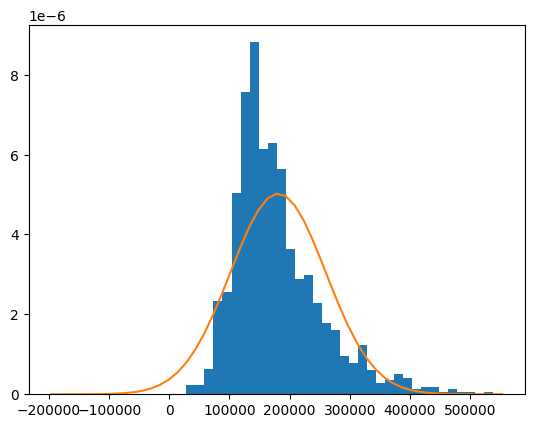

In [ ]:
plot_hist(df['SalePrice'], 15000)

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [ ]:
df['SalePrice'] = np.log(df['SalePrice'])

13.534473028231162


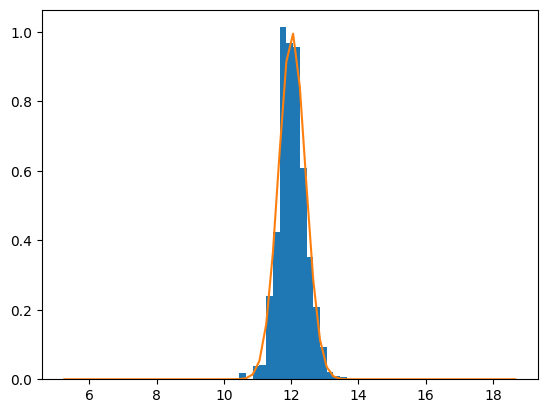

In [ ]:
plot_hist(df['SalePrice'], 0.2)

### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une partie bonus, en fin de ce notebook.

In [ ]:
df_IRQ = df

### 2.3.1 Question 7 (2.5 point)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent franchement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice

    :param attr: attribut à comparer à SalePrice
    """
    x = np.array(df[df["SalePrice"].notna()][attr]).reshape(-1, 1)
    # print(x.shape)
    y = np.array(df[df["SalePrice"].notna()]['SalePrice']).reshape(-1, 1)
    # print(y.shape)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    y_pred = regr.predict(x)
    plt.scatter(x, y, color="black")
    plt.plot( x, y_pred, color="blue", linewidth=3)

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

MSSubClass


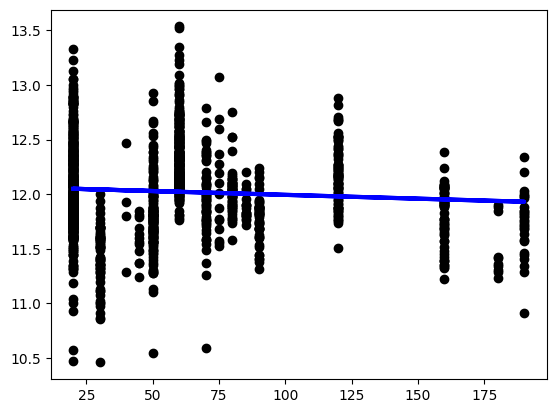

LotArea


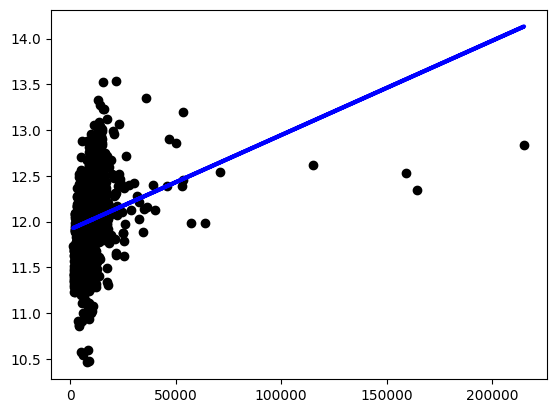

OverallCond


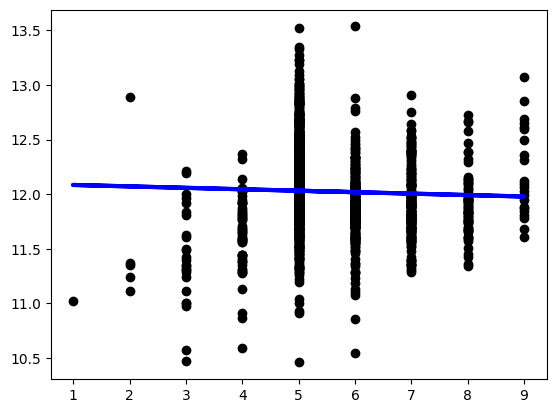

YearBuilt


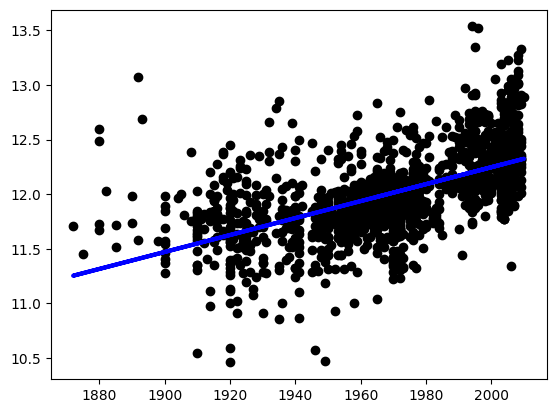

YearRemodAdd


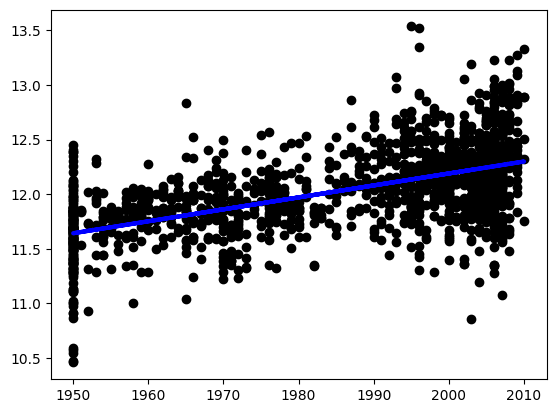

BsmtFinSF2


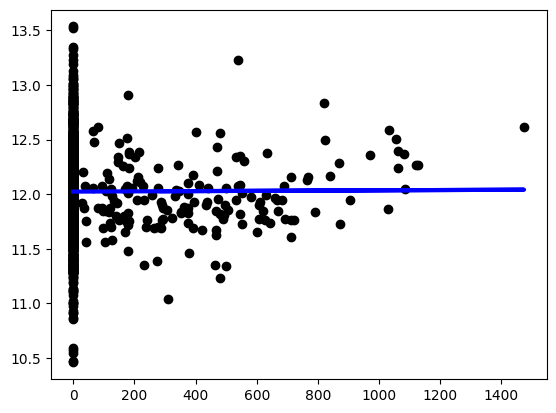

TotalBsmtSF


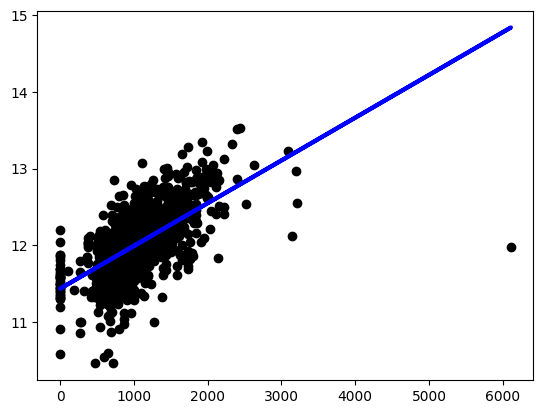

SalePrice


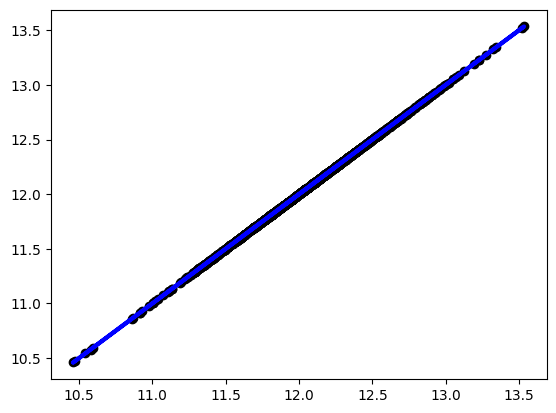

In [ ]:
for i in df.columns:
  if df[i].dtype!=object:
    print(i)
    plot_line(i)
    plt.show()

## 3. Transformation des données (2.5 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (1.5 point)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [ ]:
for i in df.columns:
  if df[i].dtype==object:
    print(i)
    print(df[i].unique() , "\n")

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 



In [ ]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,12.247694
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,12.109011
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,12.317167
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,11.849398
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,12.247694,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,12.109011,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,12.317167,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,11.849398,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,12.429216,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2915,160,1894,5,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2916,20,20000,7,1960,1996,0.0,1224.0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,85,10441,5,1992,1992,0.0,912.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [ ]:
# A utiliser dans la partie 6.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (1 point)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    scaler = StandardScaler()
    scaler.fit(dataset)
    # print(scaler.mean_)
    arr =  scaler.transform(dataset)
    return pd.DataFrame(arr, columns = dataset.columns)

In [ ]:
df = normalize(df)

In [ ]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


## 4. Sélection des attributs (4 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (2.5 point)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données normalisation des données.**

In [ ]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """

    sns.heatmap(np.abs(dataset.corr()))



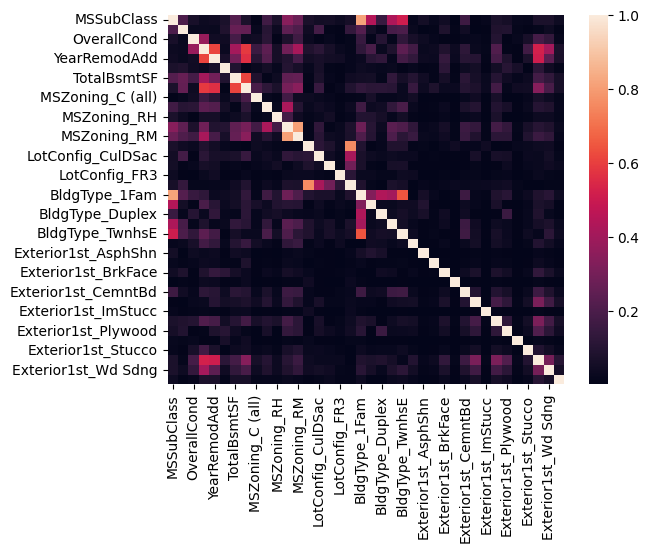

In [ ]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (1.5 point)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

In [ ]:
seuil = 0.7

In [ ]:
mat = np.array(np.abs(df.corr()))
col = df.columns
print(mat.shape)
n = mat.shape[0]
liste_correl = []
for i in range(n):
  for j in range(i+1, n-1):
    if mat[i,j] >= seuil:
      print(df.columns[i], ' and  ', df.columns[j])
      liste_correl.append(df.columns[i])


(38, 38)
MSSubClass  and   BldgType_1Fam
MSZoning_RL  and   MSZoning_RM
LotConfig_Corner  and   LotConfig_Inside


In [ ]:
liste_correl

['MSSubClass', 'MSZoning_RL', 'LotConfig_Corner']

In [ ]:
df = df.drop(liste_correl, axis = 1)

In [ ]:
df

,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,-0.094899,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


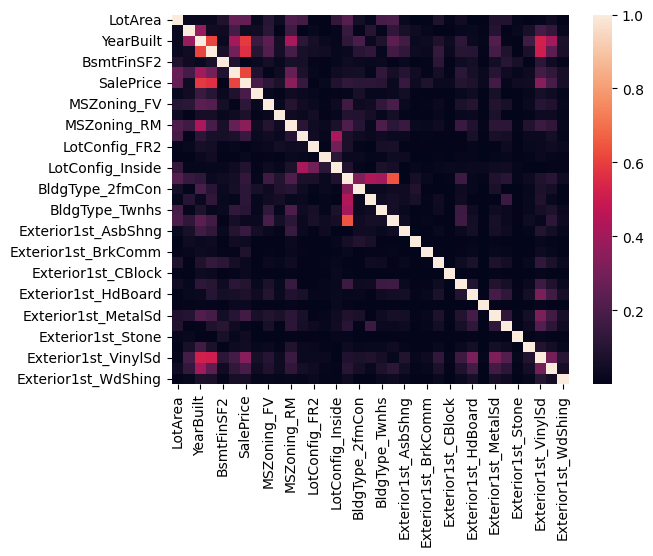

In [ ]:
display_corr_matrix(df)

## 5. Récapitulatif des prétraitements

<img src=" 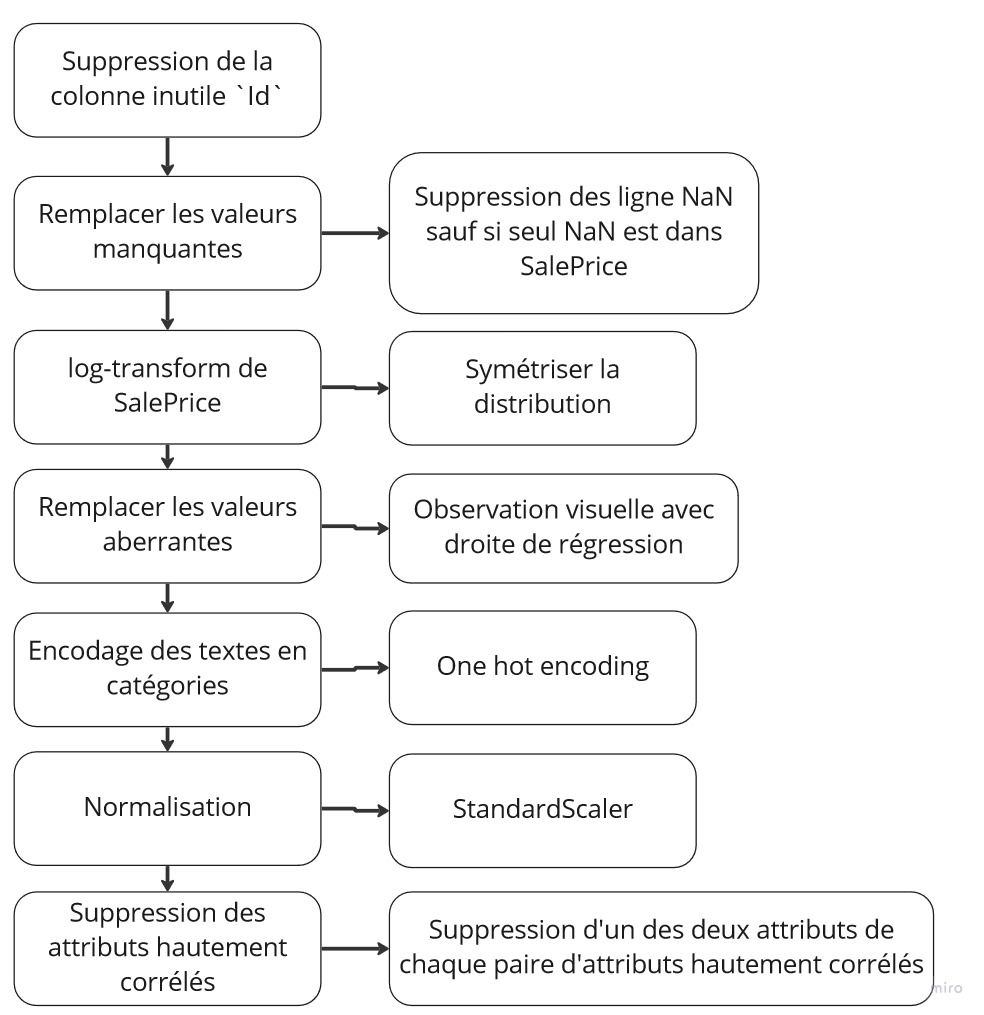" height="600px">

## 6. Entrainement d'un modèle de régression linéaire (5.5 points)

### 6.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1 x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 6.2 Application

#### 6.2.1 Question 12 (1 point)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [ ]:
x_list = list(df.columns)
x_list.remove('SalePrice')

In [ ]:
x = df[df["SalePrice"].isnull() == True][x_list]

In [ ]:
x = df[df["SalePrice"].notna()][x_list]

In [ ]:
data_train = {"x": df[df["SalePrice"].notna()][x_list], "y": df[df["SalePrice"].notna()]['SalePrice'], "df":  df[df["SalePrice"].notna()]}
data_pred = {"x": df[df["SalePrice"].isnull() == True][x_list], "df": df[df["SalePrice"].isnull() == True]}

#### 6.2.2 Question 13 (1.5 point)

Une fois cette scission faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, ce fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites. Il est aussi nécéssaire de prendre en compte certaines modifications effectuées lors de la transformation des données*

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
def ridge_regression(data_train, data_pred, alpha):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    :return:
      coefficients de la régression
    """
    rdg = Ridge(alpha)
    rdg.fit(data_train['x'], data_train['y'])
    data_pred["y"] = rdg.predict(data_pred['x'])

    return rdg.coef_

In [ ]:
reg = ridge_regression(data_train, data_pred, 0.2)
len(reg)

34

#### 6.2.3 Question 14 (1 point)

**Comparer la distribution des données prédites avec celles d'entrainement.**

4.500885231720717


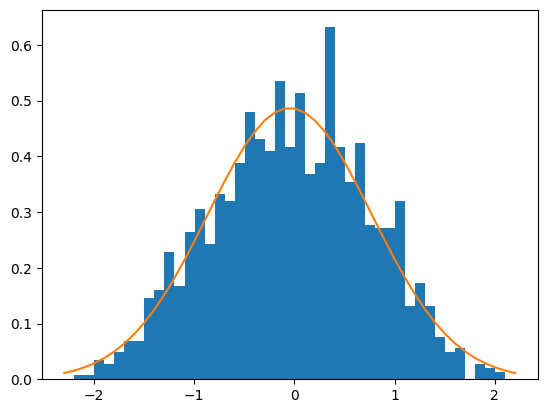

In [ ]:
plot_hist(data_pred['y'], 0.1)

#### 6.2.4 Question 15 (2 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


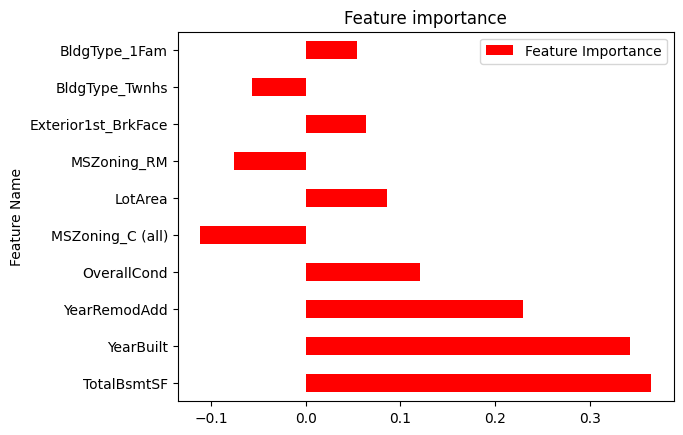

In [ ]:
feat_imp_reg = reg
reg_feat_importance = pd.DataFrame(columns=["Feature Name", "Feature Importance"])
reg_feat_importance["Feature Name"] = pd.Series(x_list)
reg_feat_importance["Feature Importance"] = pd.Series(feat_imp_reg)
# reg_feat_importance.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
sorted_reg_feat_importance = reg_feat_importance.sort_values(by = "Feature Importance", ascending = False, key= np.abs)
sorted_reg_feat_importance[:10].plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red");

## 7. Bonus : méthode des écarts interquartiles ou IRQ (1 point)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. `Plotly` considère les valeurs aberrantes comme des outliers si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

On exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

### 7.1 Question A (0.75 point)

**A quelle valeur fixer le facteur d'ajustement α ? Combien y-a-t-il alors de données aberrantes pour chaque attribut ?**

In [ ]:
col = list(df_IRQ.columns)
col.remove('SalePrice')
df_IRQ_bis = df_IRQ[col]

['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF']


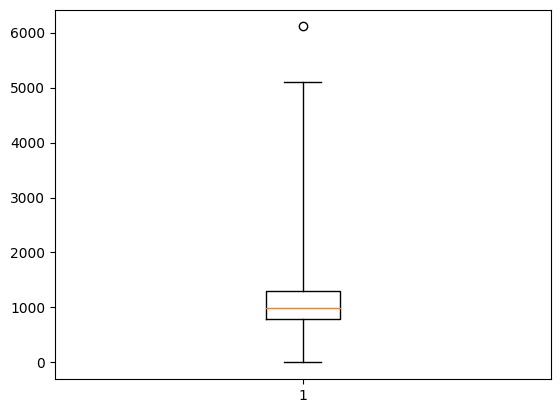

In [ ]:
plt.boxplot(df_IRQ_bis.TotalBsmtSF, whis = 9)
plt.show()

$\alpha = 9$ semble convenir ici. Il existe probablement plusieurs valeurs possibles.
On test plusieurs valeurs du paramètre 'whis' dans la fonction plt.boxplot, jusqu'à obtenir une seule valeur outlier dans le boxplot. On se rappelle que la regression linéaire donnait l'impression qu'il y avait une seule valeur vraiment abérante en traçant SalePrice = f(TotalBsmtSF).

MSSubClass


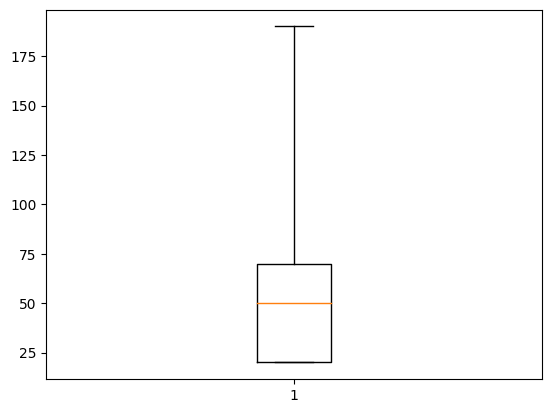

LotArea


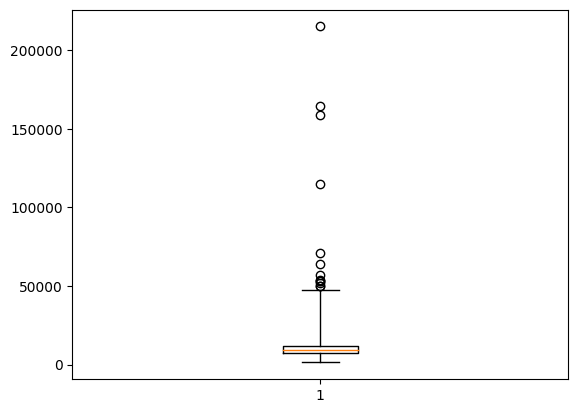

OverallCond


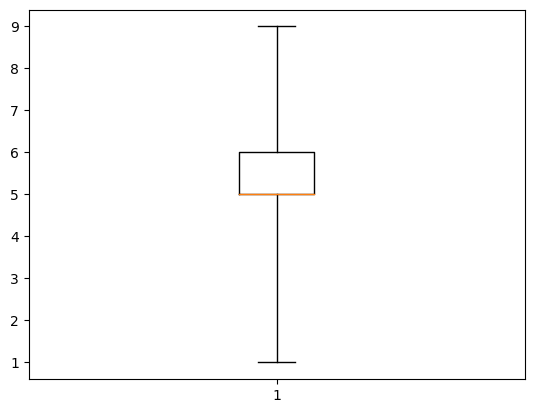

YearBuilt


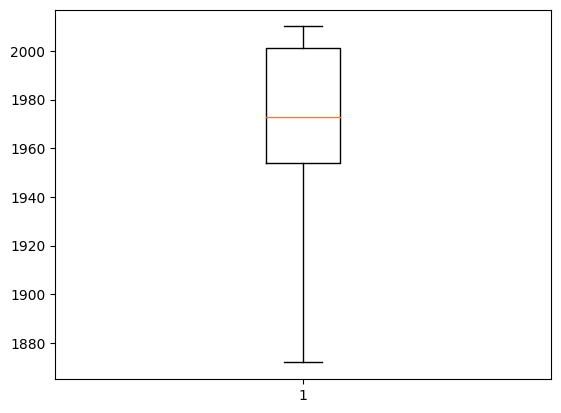

YearRemodAdd


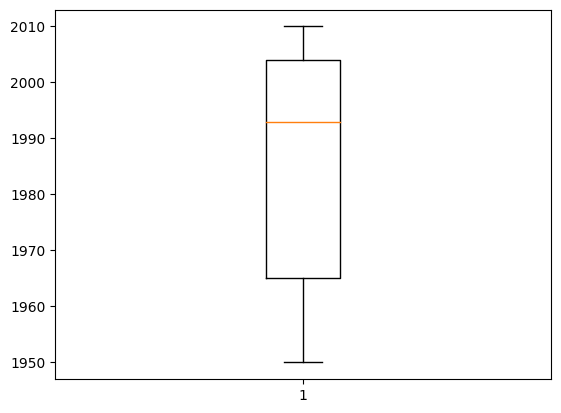

BsmtFinSF2


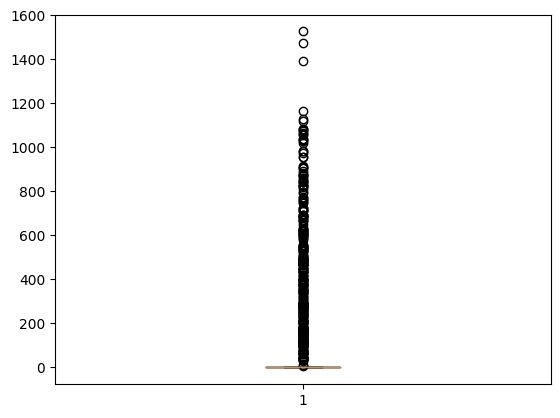

TotalBsmtSF


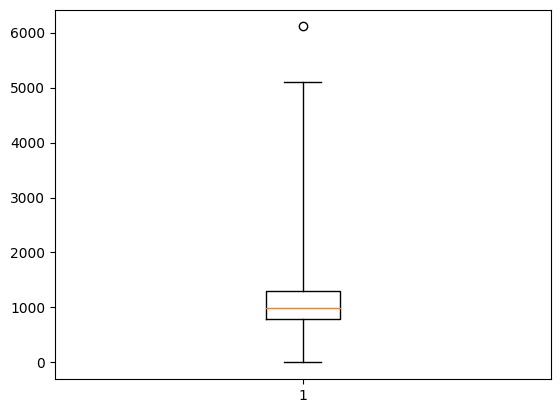

In [ ]:
d = []
for feature in col:
  if df_IRQ_bis[feature].dtype!=object:
    print(feature)
    d.append(plt.boxplot(df_IRQ_bis[feature], whis = 9))
    plt.show()

### 7.2 Question B (0.25 point)

**Traitez les données aberrantes identifiées à la question précédantes. Quel traitement appliquer ?**

In [ ]:
d[0]['fliers']